##

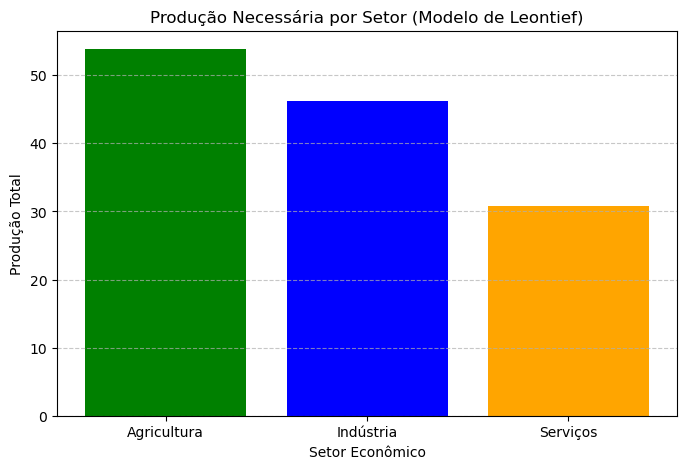

Produção necessária para atender à demanda final:
         Setor  Produção Necessária
0  Agricultura            53.846153
1    Indústria            46.153846
2     Serviços            30.769231


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gauss_seidel(A, D, tol=1e-6, max_iter=1000):
    """Resolve o sistema (I - A)X = D usando o método de Gauss-Seidel"""
    n = len(D)
    X = np.zeros(n)  # Chute inicial
    for _ in range(max_iter):
        X_new = np.copy(X)
        for i in range(n):
            sum_Ax = sum(A[i, j] * X_new[j] for j in range(n) if j != i)
            X_new[i] = (D[i] - sum_Ax) / (1 - A[i, i])
        if np.linalg.norm(X_new - X, ord=np.inf) < tol:
            break
        X = X_new
    return X

# Definição dos dados do modelo
A = np.array([[0.3, 0.2, 0.1],
              [0.4, 0.3, 0.2],
              [0.2, 0.3, 0.5]])

D = np.array([50, 60, 40])

# Resolvendo o sistema
X = gauss_seidel(A, D)

# Criando um DataFrame com os resultados
setores = ["Agricultura", "Indústria", "Serviços"]
df = pd.DataFrame({"Setor": setores, "Produção Necessária": X})

# Salvando os resultados em um arquivo Excel
df.to_excel("producao_leontief.xlsx", index=False)

# Gerando gráfico
plt.figure(figsize=(8, 5))
plt.bar(setores, X, color=['green', 'blue', 'orange'])
plt.xlabel("Setor Econômico")
plt.ylabel("Produção Total")
plt.title("Produção Necessária por Setor (Modelo de Leontief)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Exibir resultados
print("Produção necessária para atender à demanda final:")
print(df)